### POC for Recommendation Engine for a Yoga, Relaxation or Devotional Songs Music application targeted for Indian users


### Business objective- The aim of this project is to build a feature of recommendation system to support a music app. As the first phase we need to develop the proof of concept to make the client understand how effective the feature could be.


In [1]:
# loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as ms
import plotly
import plotly.graph_objects as go
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(style = "ticks", context = "talk")

In [2]:
data=pd.read_csv("C:\\Users\\nehas\\Dropbox\\PC\\Downloads\\archive(1).zip",index_col=0)

In [3]:
data.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
#this are the features in the dataset

### Exploratory Data Analysis

In [5]:
data.shape

(114000, 20)

In [6]:
#len of data
len(data)

114000

In [7]:
data.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

In [8]:
# renaming the columns
data=data.rename({'album_name':'album','track_name':'name','track_id':'id','track_genre':'genre'
                  ,'duration_ms':'duration'},axis=1)
data.head()

,id,artists,album,name,popularity,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [9]:
# is there duplicates
data[data.duplicated()].shape

(450, 20)

In [10]:
data[data.duplicated()]

,id,artists,album,name,popularity,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
1925,0CDucx9lKxuCZplLXUz0iX,Buena Onda Reggae Club,Disco 2,Song for Rollins,16,219346,False,0.841,0.577,0,-7.544,1,0.0438,0.238000,0.860000,0.0571,0.843,90.522,4,afrobeat
2155,2aibwv5hGXSgw7Yru8IYTO,Red Hot Chili Peppers,Stadium Arcadium,Snow (Hey Oh),80,334666,False,0.427,0.900,11,-3.674,1,0.0499,0.116000,0.000017,0.1190,0.599,104.655,4,alt-rock
3738,7mULVp0DJrI2Nd6GesLvxn,Joy Division,Timeless Rock Hits,Love Will Tear Us Apart,0,204621,False,0.524,0.902,2,-8.662,1,0.0368,0.000989,0.695000,0.1370,0.907,146.833,4,alternative
4648,6d3RIvHfVkoOtW1WHXmbX3,Little Symphony,Serenity,Margot,27,45714,False,0.269,0.142,0,-23.695,1,0.0509,0.866000,0.904000,0.1140,0.321,67.872,3,ambient
5769,481beimUiUnMUzSbOAFcUT,SUPER BEAVER,突破口 / 自慢になりたい,突破口,54,255080,False,0.472,0.994,8,-1.786,1,0.1140,0.025900,0.000000,0.0535,0.262,103.512,4,anime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111246,0sSjIvTvd6fUSZZ5rnTPDW,Everything But The Girl,Eden (Deluxe Edition),Another Bridge - 2012 Remaster,26,132826,False,0.480,0.853,0,-6.276,1,0.0734,0.030600,0.000001,0.3200,0.775,85.181,4,trip-hop
111362,2zg3iJW4fK7KZgHOvJU67z,Faithless,Faithless 2.0,Tarantula,21,398152,False,0.622,0.816,6,-11.095,0,0.0483,0.009590,0.578000,0.0991,0.427,136.007,4,trip-hop
111980,46FPub2Fewe7XrgM0smTYI,Morcheeba,Parts of the Process,Undress Me Now,17,203773,False,0.576,0.352,7,-10.773,0,0.0268,0.700000,0.270000,0.1600,0.360,95.484,4,trip-hop
112968,6qVA1MqDrDKfk9144bhoKp,Acil Servis,Küçük Adam,Bebek,38,319933,False,0.486,0.485,5,-12.391,0,0.0331,0.004460,0.000017,0.3690,0.353,120.095,4,turkish


In [11]:
data1=data.drop_duplicates()
# dropping the duplicates

In [13]:
data1.shape

(113550, 20)

In [14]:
# checking it is any more or not 
data1[data1.duplicated()]

,id,artists,album,name,popularity,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre


In [15]:
#is there any missing values?
data1.isnull().values.any()

True

In [16]:
#count of missing values by columns 
data1.isnull().sum()

id                  0
artists             1
album               1
name                1
popularity          0
duration            0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
genre               0
dtype: int64

In [17]:
np.where(data1.isnull()[['artists','name','album']])

(array([65630, 65630, 65630], dtype=int64), array([0, 1, 2], dtype=int64))

In [18]:
data1.iloc[[65630, 65630, 65630]]

,id,artists,album,name,popularity,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [19]:
df=data1.dropna()
#here the null values dosent make much of a change so we are dropping it from the dataset

In [20]:
df.isnull().values.any()

False

In [21]:
df.isnull().sum()

id                  0
artists             0
album               0
name                0
popularity          0
duration            0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
genre               0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113549 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                113549 non-null  object 
 1   artists           113549 non-null  object 
 2   album             113549 non-null  object 
 3   name              113549 non-null  object 
 4   popularity        113549 non-null  int64  
 5   duration          113549 non-null  int64  
 6   explicit          113549 non-null  bool   
 7   danceability      113549 non-null  float64
 8   energy            113549 non-null  float64
 9   key               113549 non-null  int64  
 10  loudness          113549 non-null  float64
 11  mode              113549 non-null  int64  
 12  speechiness       113549 non-null  float64
 13  acousticness      113549 non-null  float64
 14  instrumentalness  113549 non-null  float64
 15  liveness          113549 non-null  float64
 16  valence           11

In [23]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,113549.0,33.324433,22.283855,0.000,17.0000,35.000000,50.0000,100.000
duration,113549.0,228081.370844,106413.098525,8586.000,174184.0000,213000.000000,261588.0000,5237295.000
danceability,113549.0,0.567031,0.173409,0.000,0.4560,0.580000,0.6950,0.985
energy,113549.0,0.642091,0.251053,0.000,0.4730,0.685000,0.8540,1.000
key,113549.0,5.309452,3.560147,0.000,2.0000,5.000000,8.0000,11.000
loudness,113549.0,-8.243408,5.011422,-49.531,-9.9980,-6.997000,-5.0010,4.532
mode,113549.0,0.637866,0.480620,0.000,0.0000,1.000000,1.0000,1.000
speechiness,113549.0,0.084674,0.105762,0.000,0.0359,0.048900,0.0845,0.965
acousticness,113549.0,0.314064,0.331906,0.000,0.0168,0.168000,0.5960,0.996
instrumentalness,113549.0,0.155703,0.309217,0.000,0.0000,0.000041,0.0487,1.000


In [24]:
df.corr()

,popularity,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
popularity,1.000000,-0.007928,0.043938,0.034407,-0.002447,-0.004167,0.047368,-0.015009,-0.045463,-0.022356,-0.094718,-0.005668,-0.041097,0.012187,0.030567
duration,-0.007928,1.000000,-0.066005,-0.074117,0.058160,0.008519,-0.004233,-0.035961,-0.063194,-0.103676,0.125301,0.010199,-0.154795,0.024312,0.018351
explicit,0.043938,-0.066005,1.000000,0.122179,0.096256,0.004843,0.107988,-0.037387,0.307455,-0.093748,-0.103169,0.032367,-0.003779,-0.003097,0.038234
danceability,0.034407,-0.074117,0.122179,1.000000,0.131694,0.036546,0.256559,-0.069783,0.108236,-0.169181,-0.183974,-0.131651,0.476755,-0.051517,0.207370
energy,-0.002447,0.058160,0.096256,0.131694,1.000000,0.048047,0.760624,-0.079331,0.141976,-0.732747,-0.179967,0.184810,0.258451,0.247361,0.186671
key,-0.004167,0.008519,0.004843,0.036546,0.048047,1.000000,0.038359,-0.135871,0.020820,-0.041124,-0.006819,-0.001518,0.034233,0.010903,0.015122
loudness,0.047368,-0.004233,0.107988,0.256559,0.760624,0.038359,1.000000,-0.042074,0.060088,-0.588111,-0.432109,0.076792,0.279428,0.212181,0.191648
mode,-0.015009,-0.035961,-0.037387,-0.069783,-0.079331,-0.135871,-0.042074,1.000000,-0.046773,0.096548,-0.050787,0.013900,0.021411,0.000371,-0.024365
speechiness,-0.045463,-0.063194,0.307455,0.108236,0.141976,0.020820,0.060088,-0.046773,1.000000,-0.001378,-0.089214,0.205092,0.036393,0.017167,-0.000397
acousticness,-0.022356,-0.103676,-0.093748,-0.169181,-0.732747,-0.041124,-0.588111,0.096548,-0.001378,1.000000,0.102134,-0.020313,-0.106240,-0.207620,-0.175621


In [25]:
# saving a clean data into as csv
df.to_csv('clean_data.csv')

In [28]:
# loading the clean data
clean_data=pd.read_csv('clean_data.csv',index_col=0)
clean_data.head()

,id,artists,album,name,popularity,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [29]:
clean_data.isnull().sum()

id                  0
artists             0
album               0
name                0
popularity          0
duration            0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
genre               0
dtype: int64

In [30]:
clean_data[clean_data.duplicated()]

,id,artists,album,name,popularity,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre


## Data Visualization 

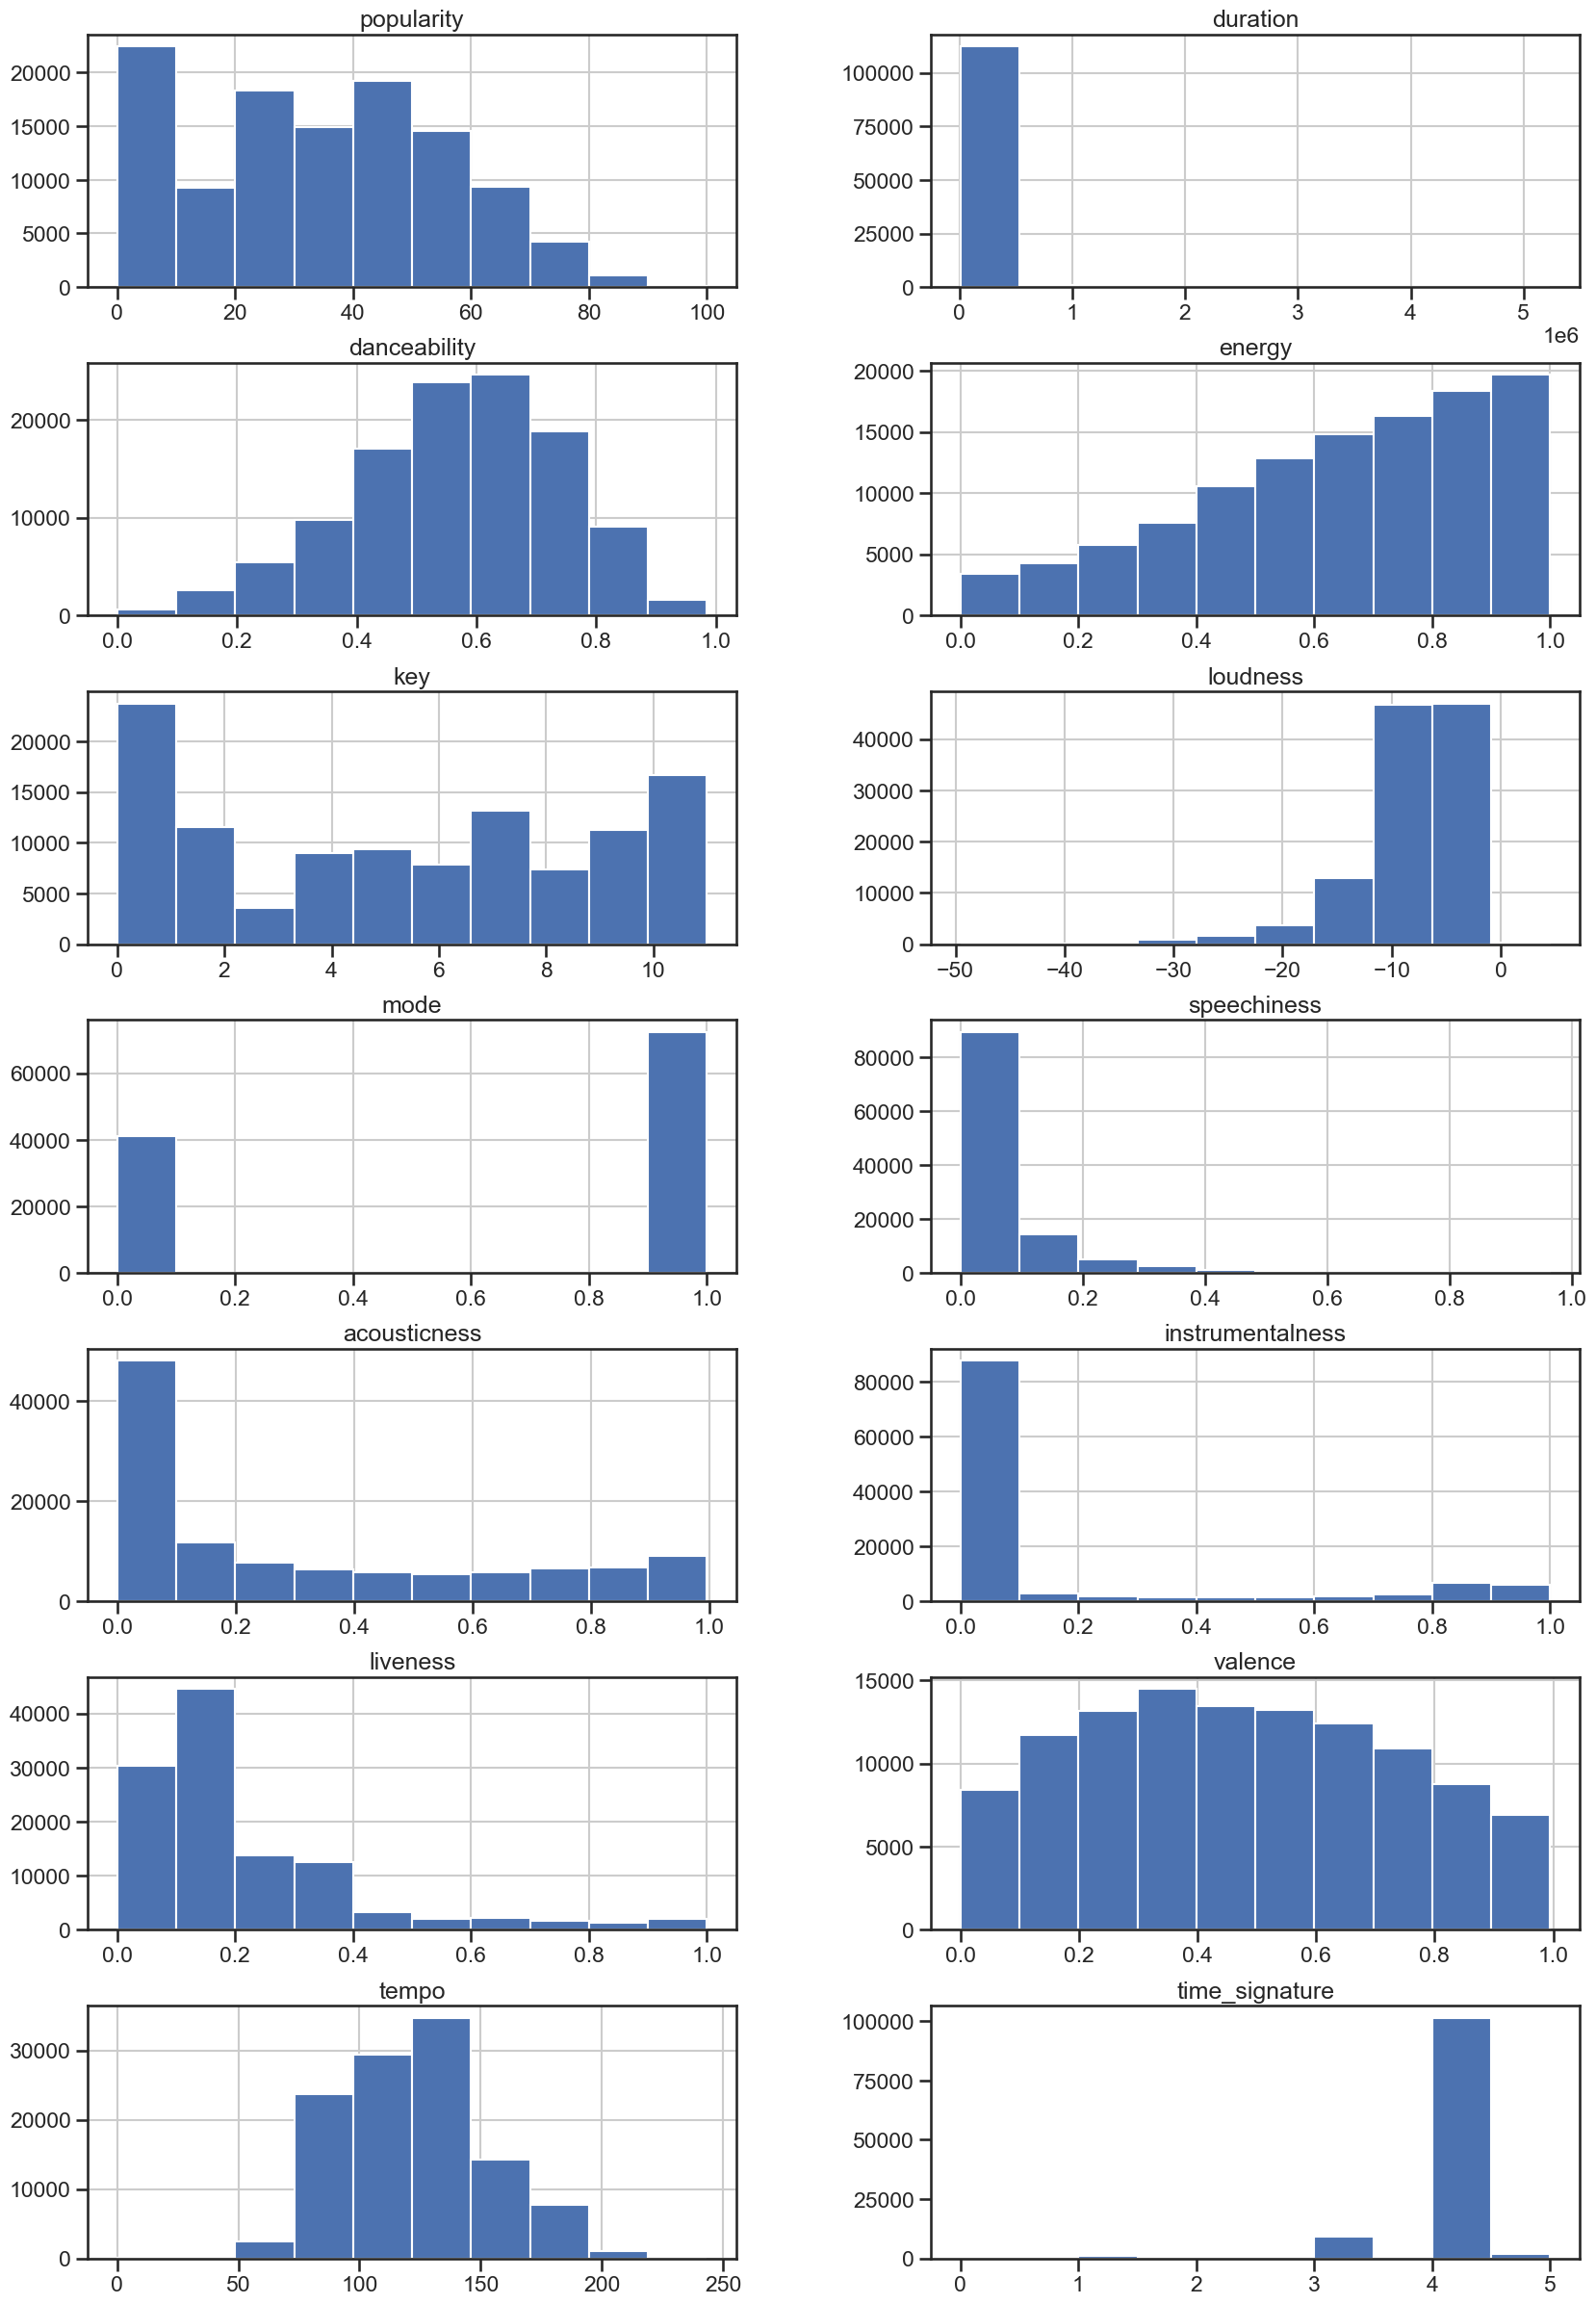

In [31]:
clean_data.hist(layout=(7,2),figsize=(20,30))
plt.grid()

<AxesSubplot:>

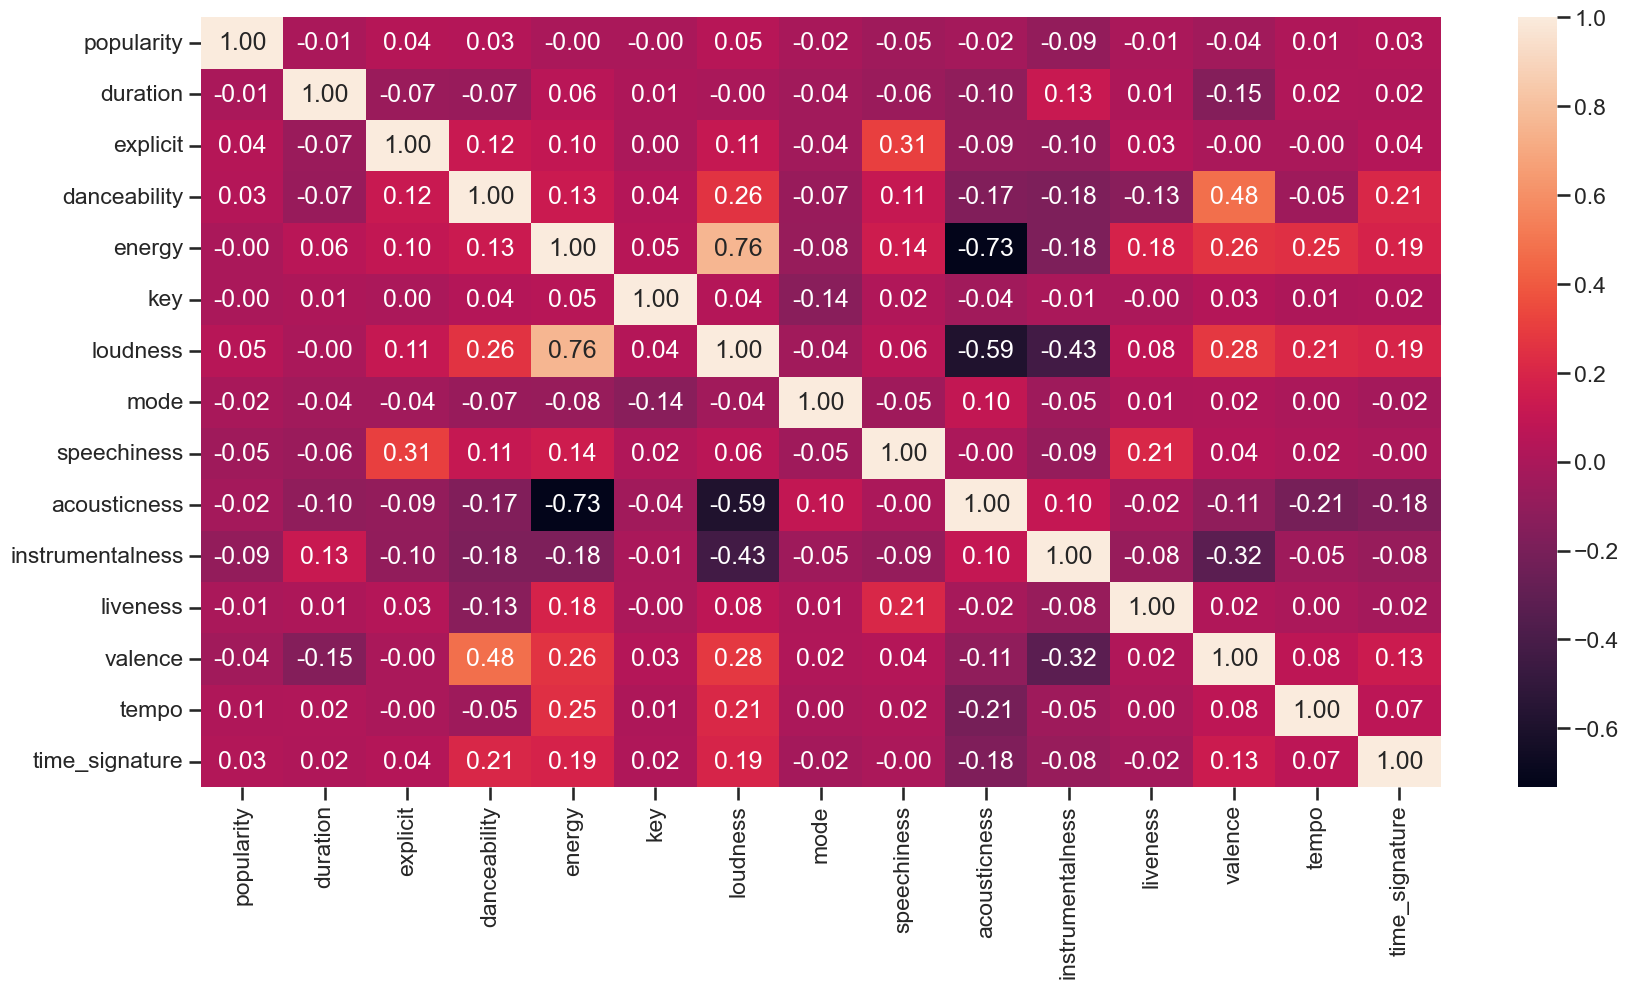

In [32]:
plt.figure(figsize=(20,10))
sns.heatmap(clean_data.corr(),fmt='.2f',annot=True)

In [ ]:
df.columns

In [33]:
# top 10 Most popular songs in the dataset
song=clean_data.groupby('name').mean()['popularity'].sort_values(ascending=False).head(10)
song

name
Unholy (feat. Kim Petras)                100.0
Quevedo: Bzrp Music Sessions, Vol. 52     99.0
La Bachata                                98.0
Me Porto Bonito                           97.0
Tití Me Preguntó                          97.0
Efecto                                    95.5
Ojitos Lindos                             94.5
Moscow Mule                               94.0
CUFF IT                                   93.0
Neverita                                  93.0
Name: popularity, dtype: float64

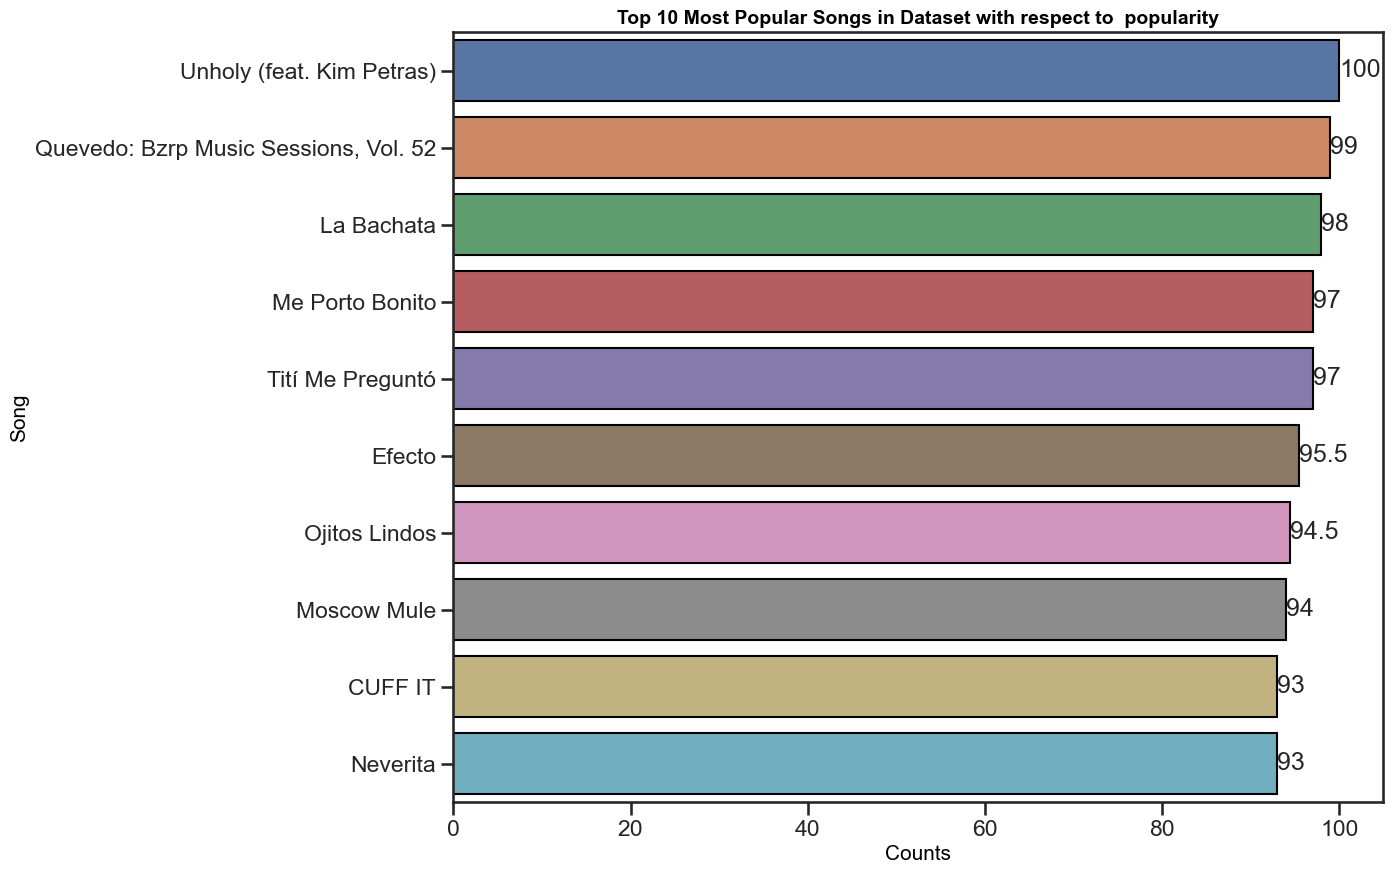

In [34]:
fig,ax=plt.subplots(figsize=(12,10))

ax=sns.barplot(x=song.values,y=song.index,orient='h',edgecolor='black',ax=ax)

ax.set_xlabel('Counts',c='black',fontsize=15)
ax.set_ylabel('Song',c='black',fontsize=15)
ax.set_title('Top 10 Most Popular Songs in Dataset with respect to  popularity',c='Black',fontsize=14,weight='bold')

for i in ax.containers:
    ax.bar_label(i,)
    
    
plt.show()

In [35]:
#top 10 most popular genre
Genre=clean_data['genre'].value_counts().head(10)
Genre

acoustic       1000
emo            1000
rock-n-roll    1000
reggaeton      1000
disco          1000
r-n-b          1000
punk-rock      1000
pagode         1000
electronic     1000
mpb            1000
Name: genre, dtype: int64

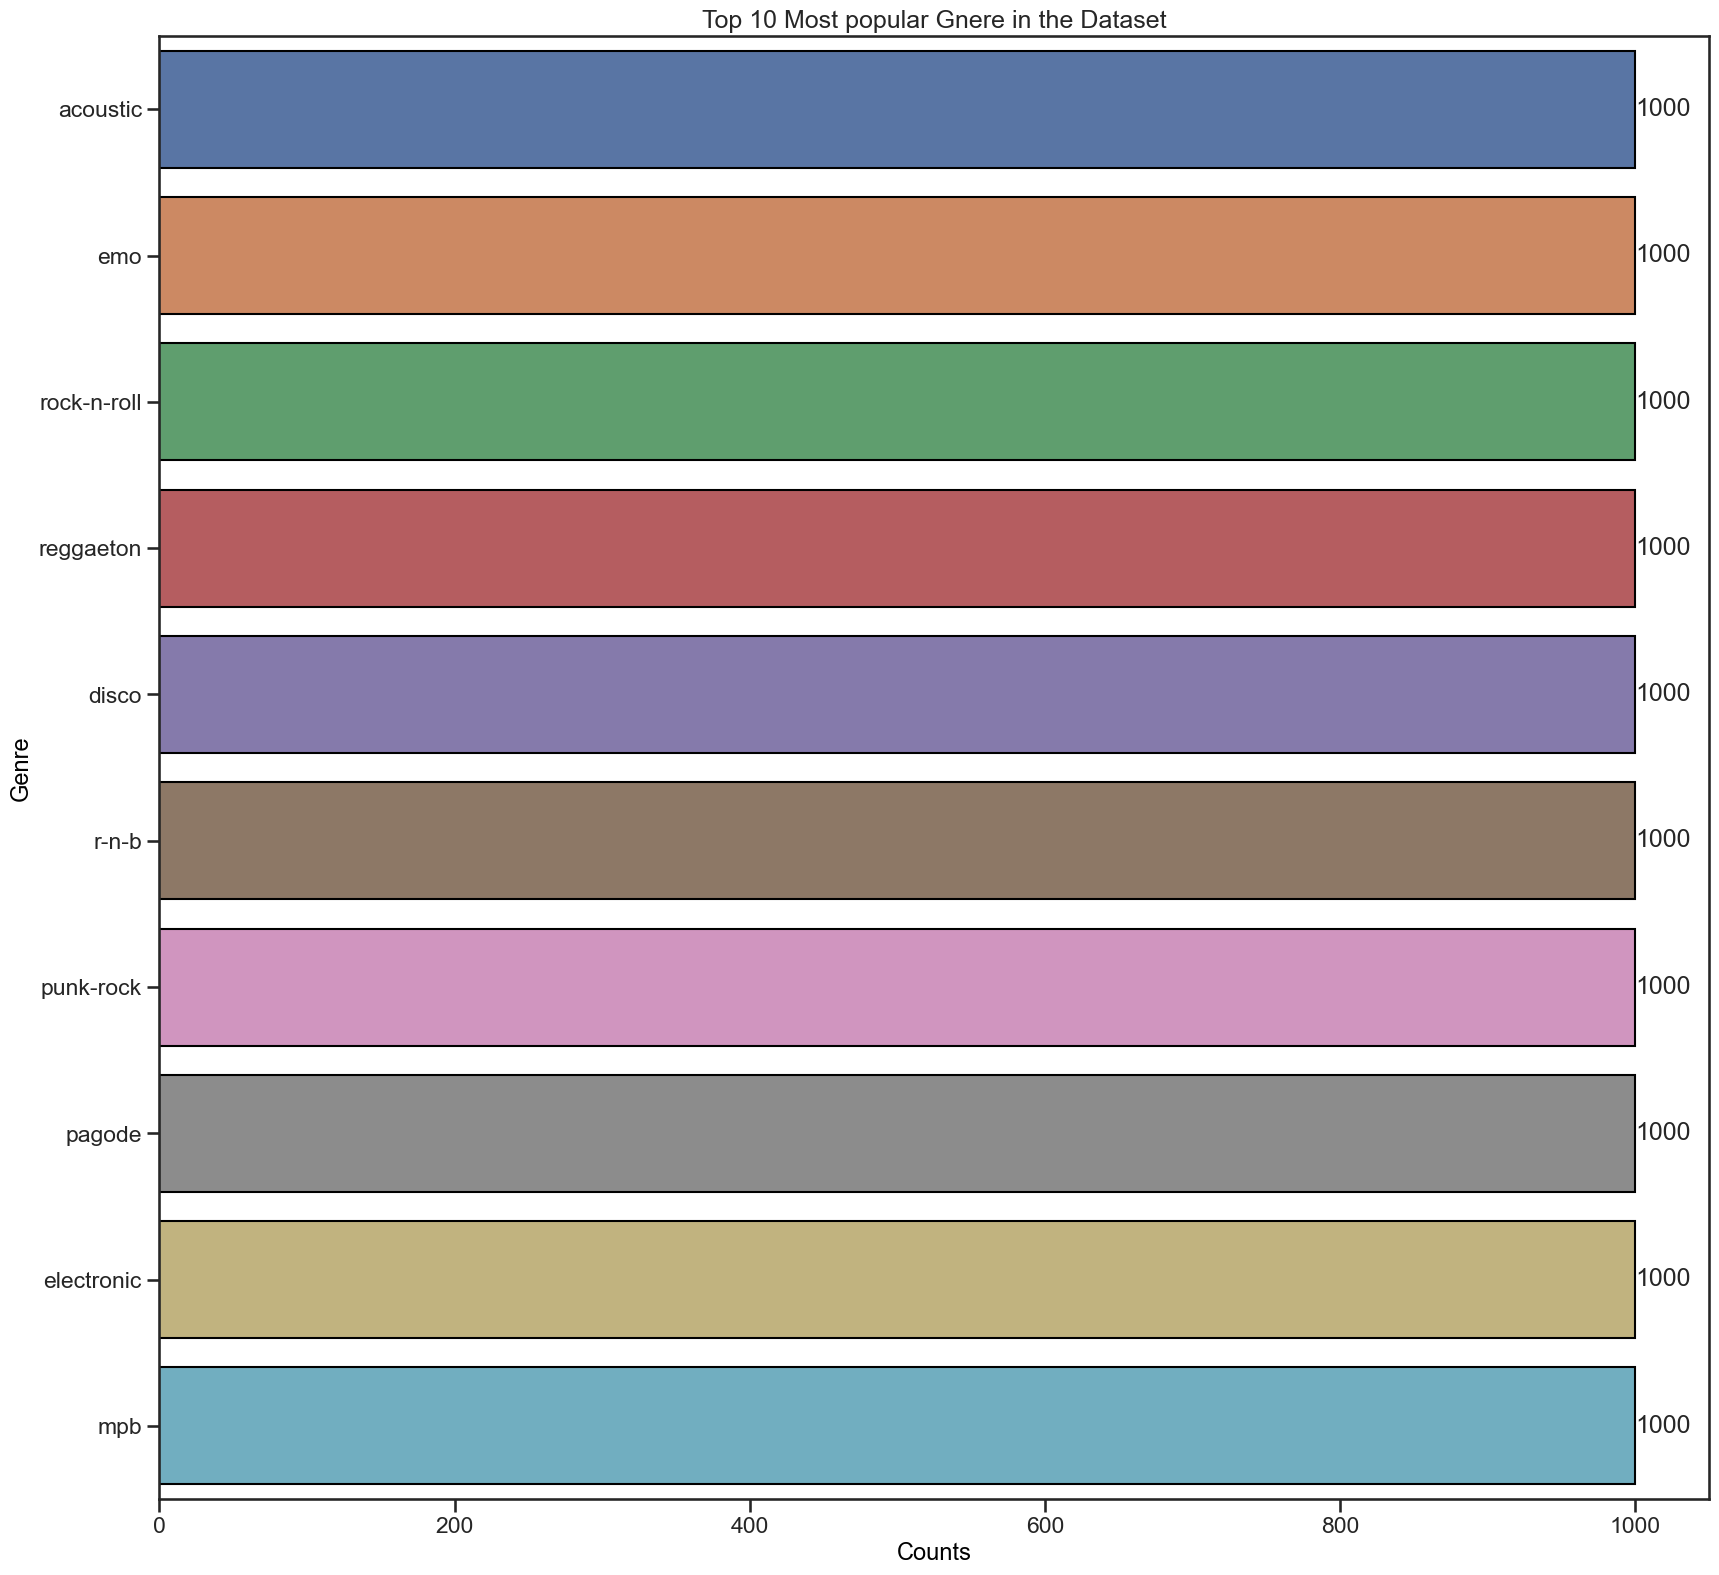

In [36]:
fig,ax=plt.subplots(figsize=(20,19))

ax=sns.barplot(x=Genre.values,y=Genre.index,edgecolor='Black',orient='h',ax=ax)

ax.set_xlabel('Counts',c='black',fontsize=17)
ax.set_ylabel('Genre',c='black',fontsize=17)
ax.set_title('Top 10 Most popular Gnere in the Dataset')

for i in ax.containers:
    ax.bar_label(i,)
    
plt.show()